# Finding the Optimal Policy for the below problem

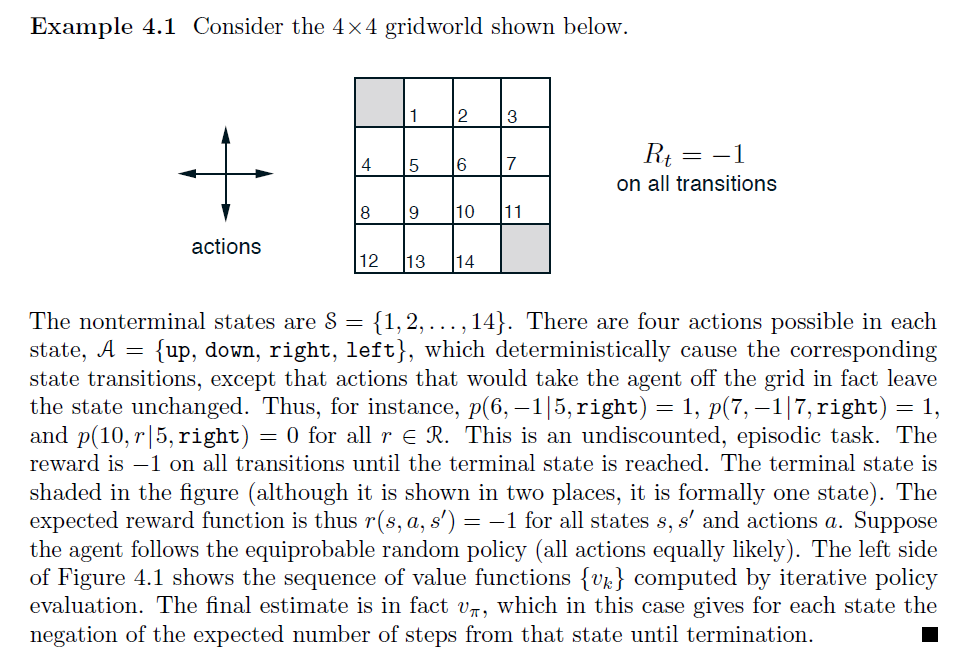

In [1]:
import random
import numpy as np


In [2]:
V = [random.random()*10 for i in range(16)]  #initialize randomly
V[0] = 0      #terminal state
V[15] = 0     #terminal state

theta = 0.0001 #accuracy
delta = 10    #difference between consecutive states

p_init = [0] + [0.25]*14 + [0]
pi = {'L':p_init.copy(),'R':p_init.copy(),'U':p_init.copy(),'D':p_init.copy()}    #policy

gamma = 1
def print_value(V):
    for i in range(16):
        print(round(V[i],2),end = '\t')
        if (i)%4 == 3:
            print('\n')
            
print_value(V)

0	6.07	7.87	1.13	

9.41	7.57	3.9	4.11	

6.33	3.77	4.04	8.64	

0.99	2.42	2.49	0	



In [3]:
def get_new_state(current_state,action):
    if current_state == 0 or  current_state == 15:    #terminal state
        return current_state
    column = current_state%4 + 1
    row = current_state//4 + 1
    
    if action == 'L':
        column = column - 1
    elif action == 'R':
        column = column + 1
    elif action == 'U':
        row = row - 1
    elif action == 'D':
        row = row + 1
    column = max(1,min(4,column))
    row = max(1,min(4,row))
    new_state = row*4 + column - 5
    return new_state

print(get_new_state(6,'D'))
    

10


## Policy Evaluation

In [4]:
def policy_evaluation(delta, V, theta):
    while delta > theta:
        delta = 0
        for current_state in range(1,15):
            v = V[current_state]
            total = 0
            for action in ('L','R','U','D'):
                total_2 = 0
                for target_state in range(0,16):
                    total_2 += (get_new_state(current_state,action) == target_state)*(-1 + gamma*V[target_state]) 
                total += total_2*pi[action][current_state] 
            V[current_state] = total
            delta = max(delta,abs(v-V[current_state]))
    return V;

V = policy_evaluation(delta, V, theta)
print_value(V)

0	-14.0	-20.0	-22.0	

-14.0	-18.0	-20.0	-20.0	

-20.0	-20.0	-18.0	-14.0	

-22.0	-20.0	-14.0	0	



## Policy Improvement

In [5]:
i=0
policy_stable = False
while policy_stable == False:
    policy_stable = True
    for state in range(1,15):
        old_action = random.choices(['L','R','U','D'],weights = [pi['L'][state],pi['R'][state],pi['U'][state],pi['D'][state]], k=1)
        new_action,total = 'L',-100000
        for action in ('L','R','U','D'):
            total_2 = 0
            for target_state in range(0,16):
                total_2 += (get_new_state(state,action) == target_state)*(-1 + gamma*V[target_state]) 
            if total_2 > total:
                new_action,total = action,total_2
        
        pi['L'][state],pi['R'][state],pi['U'][state],pi['D'][state] = 0,0,0,0
        pi[new_action][state] = 1
        if new_action != old_action:
            policy_stable = False
    V_old = V
    V = policy_evaluation(10, V, 0.0001)
    if V_old == V:
        break
    i+=1
    print(i)


In [6]:
print('\n\n-----------VALUE-----------\n\n')
print_value(V)
final_policy = ['X'] +  ['']*14 + ['X']
for state in range(16):
    for action in ('L','R','U','D'):
        if pi[action][state] == 1:
            final_policy[state] = action

print('\n\n\n-----------POLICY----------\n\n')


for i in range(16):
    print(final_policy[i],end = '\t')
    if (i)%4 == 3:
        print('\n')



-----------VALUE-----------


0	-1.0	-2.0	-3.0	

-1.0	-2.0	-3.0	-2.0	

-2.0	-3.0	-2.0	-1.0	

-3.0	-2.0	-1.0	0	




-----------POLICY----------


X	L	L	L	

U	U	L	D	

U	U	R	D	

U	R	R	X	

